In [1]:
import gym
import numpy as np
import random 
import sys
import matplotlib.pyplot as plt

terminal_output = open(1, 'w')

env = gym.make("CardFinder-v1")
env.reset()                    
env.render()


SFFHHFHFF
FHHFFFHFF
FFHFFHFFF
FHFHFFHFF
HHFHFFFFF
FFFHFFHFF
FFHFFHHFF
FFHFFFFFH
HFFFFHFFG


In [2]:
print("Action space: ", env.action_space)
print("Observation space: ", env.observation_space)

Action space:  Discrete(4)
Observation space:  Discrete(81)


In [3]:
state_size = env.observation_space.n  # visas būsenų skaičius
action_size = env.action_space.n      # visas veiksmų skaičius
qtable = np.zeros((state_size, action_size)) # generuojama Q lentelė ir ji užpildoma nuliais
qtable_history = []
score_history = []
# print(qtable)

In [4]:
# parameterai kuriais varijuojama
learning_rate = 0.8 # Apsimokymo dažnis arba learningRate
gamma = 0.9  # Nuolaidos dydis arba gamma
epsilon = 1.0 # Tyrinėjimo tikimybė
max_epsilon = 1.0    # Maksimali tyrinėjimo tikimybės reikšmė
min_epsilon = 0.001   # Minimali tyrinėjimo tikimybės reikšmė 
decay_rate= 0.00005    # Tyrinėjimo tikimybės mažinimo dydis

total_episodes = 250000 # Maksimalus iteracijų kiekis
max_steps = 400 # Maksimalus žingsnių per vieną iteraciją kiekis 

# learning_rate = 0.8
# gamma = 0.9  
# epsilon = 1.0
# max_epsilon = 1.0    
# min_epsilon = 0.001   
# decay_rate= 0.00005    

# total_episodes = 250000
# max_steps = 400

In [5]:
rewards = []
steps_total = []
passNr = 0
passNrLast100 = 0

for episode in range(total_episodes):
    # Aplinka nustatoma iš naujo
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    
    print("Epizodas: "+ str(episode), file=terminal_output)
    
    for step in range(max_steps):

        # generuojamas atsitiktinis skaičius
        exp_exp_tradeoff = random.uniform(0, 1)
        
        # jei generuotas kaičius > epsilon tada naudojamasi Q lentele
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(qtable[state,:])
            #print(exp_exp_tradeoff, "action", action)

        # jei generuotas kaičius < arba = epsilon tada agentas tyrinėja atsitiktinai
        else:
            action = env.action_space.sample()
            #print("action random", action)
            
        
        # Daromas pasirinktas žingsnis ir stebimi rezultatai
        new_state, reward, done, info = env.step(action)
        if reward == 20:
            passNr += 1
            
        # naudojantis Q funkcija naujimana lentelė
        # Funkcija Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action])
        
        total_rewards += reward

        # po to kai viskas atnaujinama dabar tinė būsena pakeičiama
        state = new_state
        
        # Jei tikslas pasiektas epizodas baigiamas
        if done == True: 
            break
        
    # epsilon skaičiaus mažinimas, nes jau turime kažkiek išmoktos informacijos
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode) 
    rewards.append(total_rewards)
    steps_total.append(step)
    
    if reward == 20 and episode>=(total_episodes-100):
        passNrLast100 += 1
        
    if episode % 10000 == 0:
        print('Episode: {} Reward: {} Episode reward: {} Steps Taken: {} Pasiekė tikslą: {}'.format(episode, reward, total_rewards, step, passNr))
    
    episode_count = episode + 1
    if episode_count % 10000 == 0:
        qtable_history.append(qtable)
        score_history.append(sum(rewards)/episode_count)


Episode: 0 Reward: 20 Episode reward: -1221 Steps Taken: 350 Pasiekė tikslą: 1
Episode: 10000 Reward: 20 Episode reward: -103 Steps Taken: 51 Pasiekė tikslą: 9454
Episode: 20000 Reward: 20 Episode reward: -184 Steps Taken: 132 Pasiekė tikslą: 19449
Episode: 30000 Reward: 20 Episode reward: -212 Steps Taken: 196 Pasiekė tikslą: 29346
Episode: 40000 Reward: -1 Episode reward: -427 Steps Taken: 399 Pasiekė tikslą: 38597
Episode: 50000 Reward: -1 Episode reward: -409 Steps Taken: 399 Pasiekė tikslą: 46204
Episode: 60000 Reward: -1 Episode reward: -418 Steps Taken: 399 Pasiekė tikslą: 51627
Episode: 70000 Reward: -1 Episode reward: -400 Steps Taken: 399 Pasiekė tikslą: 54769
Episode: 80000 Reward: -1 Episode reward: -400 Steps Taken: 399 Pasiekė tikslą: 56290
Episode: 90000 Reward: -1 Episode reward: -400 Steps Taken: 399 Pasiekė tikslą: 56813
Episode: 100000 Reward: -1 Episode reward: -400 Steps Taken: 399 Pasiekė tikslą: 56980
Episode: 110000 Reward: -1 Episode reward: -400 Steps Taken: 3

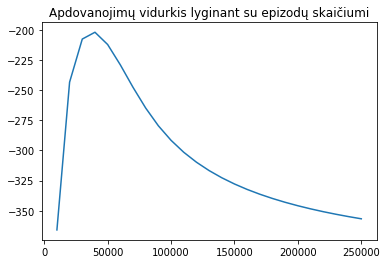

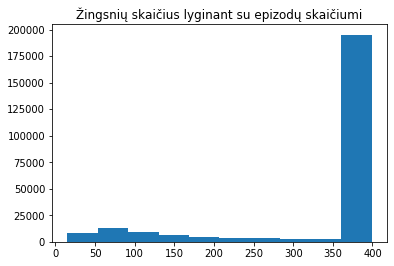

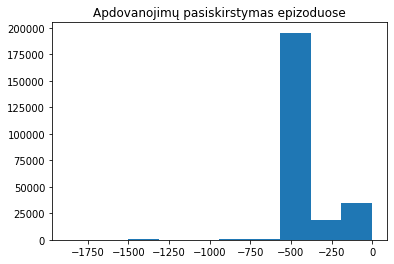

Dalis epizodų kurie pasiekė tikslą: 0.2282
Dalis epizodų kurie pasiekė tikslą (iš paskutinio 100 epizodų): 0.0
Vidutinis žingsnių skaičius: 341.46
Vidutinis žingsnių skaičius (iš paskutinio 100 epizodų): 399.00


In [6]:
plt.plot(list(range(0, total_episodes+1, round((total_episodes+1)/len(score_history))))[1:], score_history)
plt.title("Apdovanojimų vidurkis lyginant su epizodų skaičiumi")
plt.show()

plt.hist(steps_total, orientation="vertical")
plt.title("Žingsnių skaičius lyginant su epizodų skaičiumi")
plt.show()

plt.hist(rewards, align='mid')
plt.title("Apdovanojimų pasiskirstymas epizoduose")
plt.show()

print("Dalis epizodų kurie pasiekė tikslą: {0}".format(passNr/total_episodes))
print("Dalis epizodų kurie pasiekė tikslą (iš paskutinio 100 epizodų): {0}".format(passNrLast100/100))

print("Vidutinis žingsnių skaičius: %.2f" % (sum(steps_total)/total_episodes))
print("Vidutinis žingsnių skaičius (iš paskutinio 100 epizodų): %.2f" % (sum(steps_total[-100:])/100))

In [7]:
env.reset()
amountsPassed = 0
amountToTest = 100
steps_total_test = []
for episode in range(amountToTest):
    state = env.reset()
    step = 0
    done = False
    # print("****************************************************")
    # print("EPISODE ", episode)
    # env.render()
    
    for step in range(max_steps):
        
        # pasirenkamas geriausias (nešantis didžiausią apdovanojimą) galimas veiksmas naudojantis Q lentele
        action = np.argmax(qtable[state,:])
        
        new_state, reward, done, info = env.step(action)
        # print("Reward", reward)
        # env.render()
        if done:
            if reward == 20: 
                amountsPassed += 1
            # env.render()
            
            # print("steps", step)
            steps_total_test.append(step)
            break
        state = new_state
print("Apmokytas modelis teisingai išsprendė: "+str(amountsPassed) + " iš " + str(amountToTest))
env.close()

Trained model passed: 0 out of 100


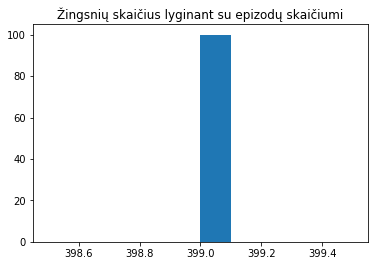

Vidutinis žingsnių skaičius per testą: 399.00


In [8]:
plt.hist(steps_total_test, orientation="vertical")
plt.title("Žingsnių skaičius lyginant su epizodų skaičiumi")
plt.show()

print("Vidutinis žingsnių skaičius per testą: %.2f" % (sum(steps_total_test)/amountToTest))